In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## Object detection

> 직사각형 안에 무엇이 있는지 찾는 것 

```
Multi-Labeled Classification + Bounding Box Regression(Localization)

여러 물체에 대해 어떤 물체인지 분류하는 Classification문제와 그 물체가 어디 있는지 
박스(Bounding box)를 통해 위치 정보를 나타내는 Localization문제 둘 다를 해내야 하는 분야
```

### Object dection paper flow 

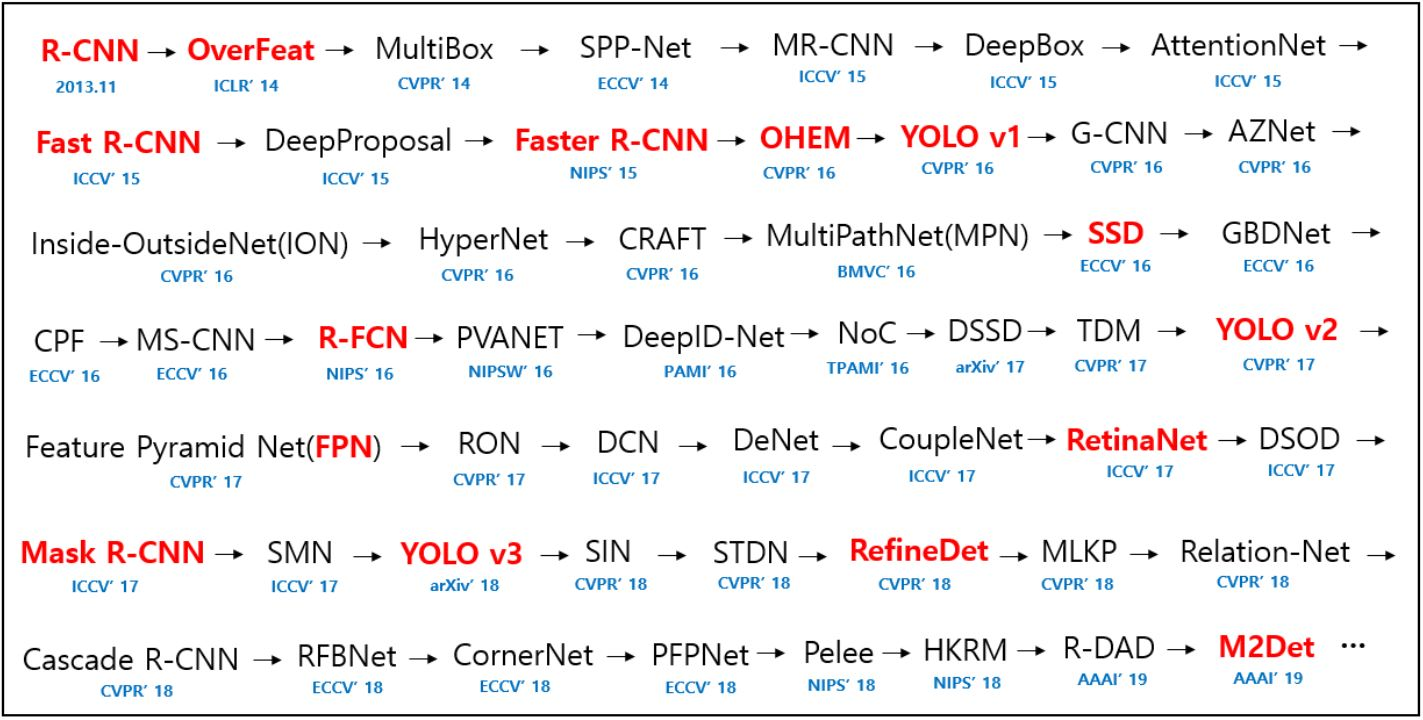

```
R-CNN은 object detection 문제에서 CNN을 활용한 최초의 논문이다 
```

## Localization 

> 객체라고 판단되는 곳에 직사각형(bounding box)를 그려주는 작업

## Segmentation

> 모든 픽셀의 label을 예측한다

```python
1. Semantic segmentation
- 모든 픽셀을 미리 지정된 개수의 class로 분류하는 것 
- 동일한 객체들끼리는 한 번에 masking을 수행한다 
2. Instance segmentation
- sematic segmentation와 유사하지만 같은 class이더라도 다른 것으로 분류한다 
- 동일한 객체들이여도 개별로 masking을 수행한다 
```

## Naive approach

> 물체가 존재할 수 있는 모든 크기의 영역에 대해 sliding window 방식으로 이미지를 모두 탐색하면서 classificaion을 수행하는 방식 <br>
> 탐색해야 할 영역이 많기 때문에 연산 시간이 오래걸리고 비효율적인 방법이다 

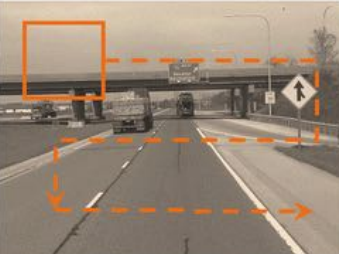

## Sliding window 

> 일정 크기의 Window를 이미지 위에서 조금씩 옮기면서 값을 비교하는 알고리즘

## Region proposals

> sliding window 방식의 비효율성을 개선하기 위해 입력 영상에서 '물체가 있을 법한' 영역을 빠른 속도로 찾아내는 알고리즘 

## Selective search 

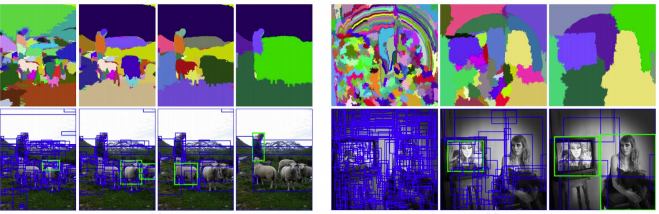

```
객체의 주변 간의 색감, 질감 차이, 다른 물체에 둘러 쌓여 있는지 여부 등을 파악해서 
다양한 전략으로 물체의 위치를 파악할 수 있도록 하는 알고리즘

Bounding box들을 Random하게 많이 생성을 하고 이들을 조금씩 Merge해나가면서 물체를 인식해 나간다
```

In [1]:
!pip install selective-search

In [31]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=62bf5ccdac80560c7beb9d06bd916424193402b8469598f39287f99934fe1831
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [48]:
!pip install -U opencv-contrib-python

     |████████████████████████████████| 56.1 MB 36 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [32]:
import selective_search
import selectivesearch

In [18]:
import skimage
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.patches as pts

In [5]:
dir(selective_search)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'box_filter',
 'core',
 'measure',
 'selective_search',
 'structure',
 'util']

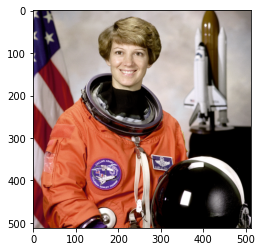

In [9]:
plt.imshow(data.astronaut())

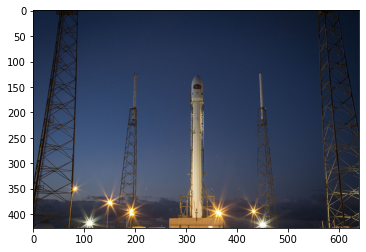

In [10]:
plt.imshow(data.rocket())

In [12]:
im = data.rocket()

In [13]:
ss = selective_search.selective_search(im) # 좌표값을 list로 찾아준다 

In [14]:
len(ss)

489

In [24]:
boxes = selective_search.box_filter(ss, topN=30)

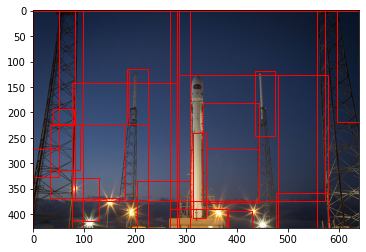

In [26]:
fig, ax = plt.subplots(1,1)
ax.imshow(im)
for b in boxes:
  box = pts.Rectangle((b[0],b[1]), b[2]-b[0], b[3]-b[1], fill=None, edgecolor='red') # xy(원점), width, height
  ax.add_patch(box)

In [45]:
ss2 = selective_search.selective_search(im, mode='fast')

In [46]:
boxes = selective_search.box_filter(ss2, topN=30)

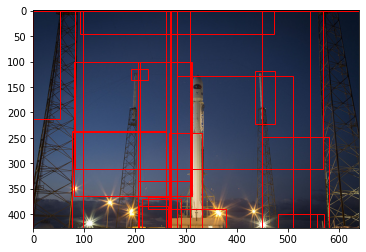

In [47]:
fig, ax = plt.subplots(1,1)
ax.imshow(im)
for b in boxes:
  box = pts.Rectangle((b[0],b[1]), b[2]-b[0], b[3]-b[1], fill=None, edgecolor='red') 
  ax.add_patch(box)

In [28]:
im2 = data.astronaut()

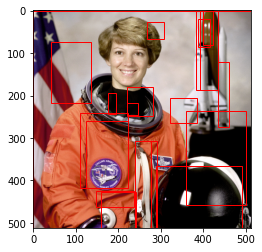

In [30]:
ss = selective_search.selective_search(im2)
boxes = selective_search.box_filter(ss, topN=20)

fig, ax = plt.subplots(1,1)
ax.imshow(im2)
for b in boxes:
  box = pts.Rectangle((b[0],b[1]), b[2]-b[0], b[3]-b[1], fill=None, edgecolor='red') # xy(원점), width, height
  ax.add_patch(box)

In [43]:
sss = selectivesearch.selective_search(im, min_size=500) # numpy로 찾아준다 

In [35]:
sss[1] # 영역 

[{'labels': [0.0], 'rect': (0, 0, 18, 7), 'size': 121},
 {'labels': [1.0], 'rect': (19, 0, 9, 8), 'size': 65},
 {'labels': [2.0], 'rect': (16, 0, 32, 15), 'size': 207},
 {'labels': [3.0], 'rect': (45, 0, 14, 35), 'size': 223},
 {'labels': [4.0], 'rect': (57, 0, 34, 10), 'size': 300},
 {'labels': [5.0], 'rect': (88, 0, 29, 65), 'size': 209},
 {'labels': [6.0], 'rect': (89, 0, 49, 7), 'size': 217},
 {'labels': [7.0], 'rect': (133, 0, 42, 15), 'size': 242},
 {'labels': [8.0], 'rect': (152, 0, 68, 8), 'size': 292},
 {'labels': [9.0], 'rect': (214, 0, 22, 7), 'size': 96},
 {'labels': [10.0], 'rect': (232, 0, 32, 8), 'size': 189},
 {'labels': [11.0], 'rect': (265, 0, 20, 9), 'size': 114},
 {'labels': [12.0], 'rect': (269, 0, 26, 5), 'size': 118},
 {'labels': [13.0], 'rect': (291, 0, 22, 15), 'size': 218},
 {'labels': [14.0], 'rect': (307, 0, 20, 15), 'size': 145},
 {'labels': [15.0], 'rect': (312, 0, 18, 6), 'size': 81},
 {'labels': [16.0], 'rect': (325, 0, 28, 9), 'size': 115},
 {'labels': 

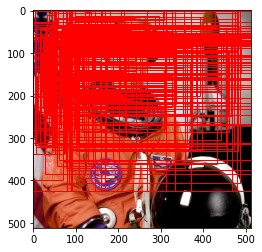

In [44]:
fig, ax = plt.subplots(1,1)
ax.imshow(im2)
for b in sss[1]:
  box = pts.Rectangle((b['rect'][0],b['rect'][1]), b['rect'][2]-b['rect'][0], b['rect'][3]-b['rect'][1], fill=None, edgecolor='red') # xy(원점), width, height
  ax.add_patch(box)

In [50]:
import cv2 # 속도가 빠르고 다른 라이브러리와 연동하기가 좋다 

In [51]:
ssss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() # monkey patch / opencv-contrib-python 모듈을 설치하면서 모듈이 확장되었다 

In [52]:
ssss.setBaseImage(im)

In [53]:
ssss.switchToSelectiveSearchFast() # 빠르게 찾는다 
# ssss.switchToSelectiveSearchQuality() # 좀 더 느리게 찾지만 비교적 정확하게 찾음 

In [54]:
rect = ssss.process()

In [55]:
rect

array([[594, 388,  46,  39],
       [433, 191,  48, 236],
       [590, 194,  32,  28],
       ...,
       [  0,   0, 196, 427],
       [169,   0, 471, 427],
       [182,   0, 458, 427]], dtype=int32)

In [57]:
cv2.setUseOptimized(True)

## R-CNN

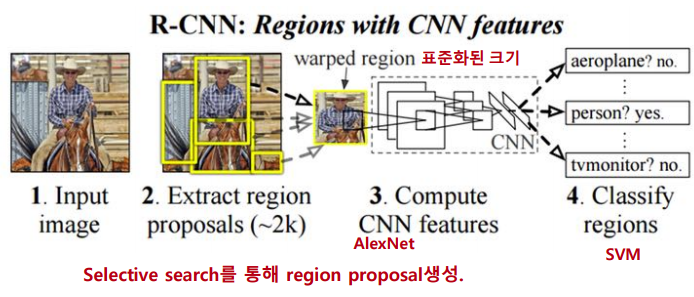

```python
1. 이미지를 input data로 넣는다 
2. 2000개의 bounding box를 selective search 알고리즘을 통해 추출한다 
3. Flatten하기 위해 2000개의 bounding box를 같은 크기로 만든다 (warping) 
- warping: 휘어지게 하다 - 왜곡하다의 의미로 보정이나 찌그러진 이미지를 정규화 하기위한 처리 방법 
4. warped image를 CNN 모델에 넣는다  
5. 마지막으로 SVM을 활용해 분류 한다  
```

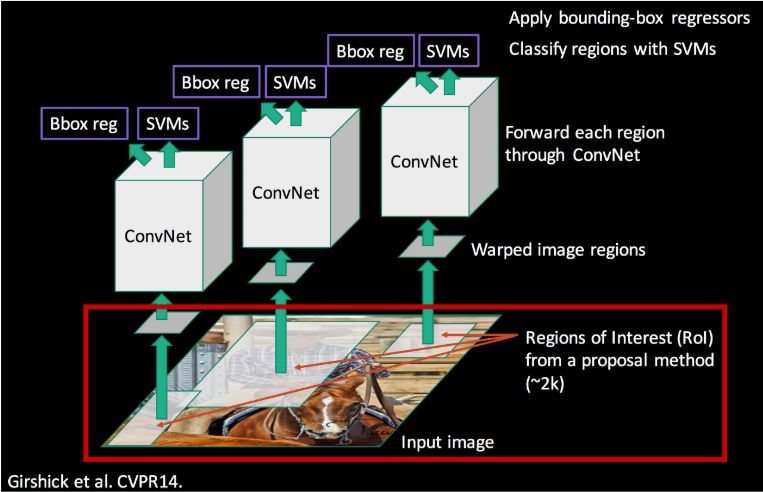

## Domain-specific fine-tuning

```
기존에 AlexNet은 1000가지 이미지를 분류하는 모델이었다 
그런데 R-CNN에서 해결하고자 하는 목표는 20가지 이미지를 분류해야 한다 
따라서 Catastrophic forgetting을 막기 위해서 fine-tuning을 할 필요가 있다 

AlexNet은 맨 끝에 있는 layer가 1000가지를 분류하기 때문에 마지막 layer를 변형해야 한다
우선 가장 먼저 feature selection하는 부분을 frozen 즉, trainable=False를 한다 
그리고 초기 가중치를 그대로 사용한다(새로 학습할 이미지가 기존 이미지와 유사하기 때문에 가능하다) 
그 다음 learning rate를 줄인후 PASCAL VOC dataset으로 학습 시킨다
그리고 나서 Fine tuning작업을 거쳐야 한다 
frozen된 것을 풀고나서 learning rate를 확 줄이면서 재학습을 시킨다 
```

### R-CNN의 문제점

```python
1. AlexNet의 구조를 사용했기 때문에 입력 이미지의 크기를 강제하므로 crop이나 
wrapping으로 인한 이미지 손실이나 변형으로 성능 저하가 될 수 있다 
2. 2000개의 bounding box에 대해 순차적으로 CNN을 수행하기 때문에 실행 시간이 길어진다 
3. Region proposal이나 SVM때문에 GPU 사용에 적합하지 않다 
4, 3개의 다른 모델을 학습시켜야 하기 때문에 전체적인 pipeline을 학습시키기 어려운 문제가 있다 
```

## Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition 

> SPPNet<br>
> Global average pooling에 영향을 받았다 

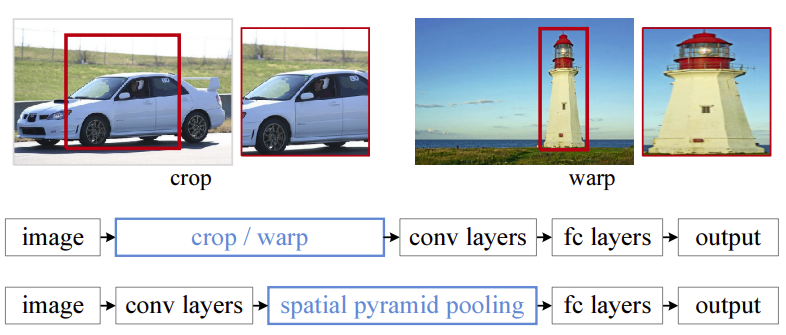

```python
R-CNN에서 2000개의 bounding box가 FC layer로 들어가기 위해서 wrapping하는 작업을 거치는데 
이때 이미지의 크기를 고정된 크기로 자르거나 비율을 조정하기 때문에 본래의 이미지랑 달라지는 문제가 있었다 

이러한 문제점을 해결하기 위해 입력 이미지의 크기에 관계없이 convolution layer를 통과 시키고 
FC layer에 통과하기 전에 feature map들을 동일한 크기로 조절해주는 pooling을 적용하자는 아이디어를 활용하게 된다 
```

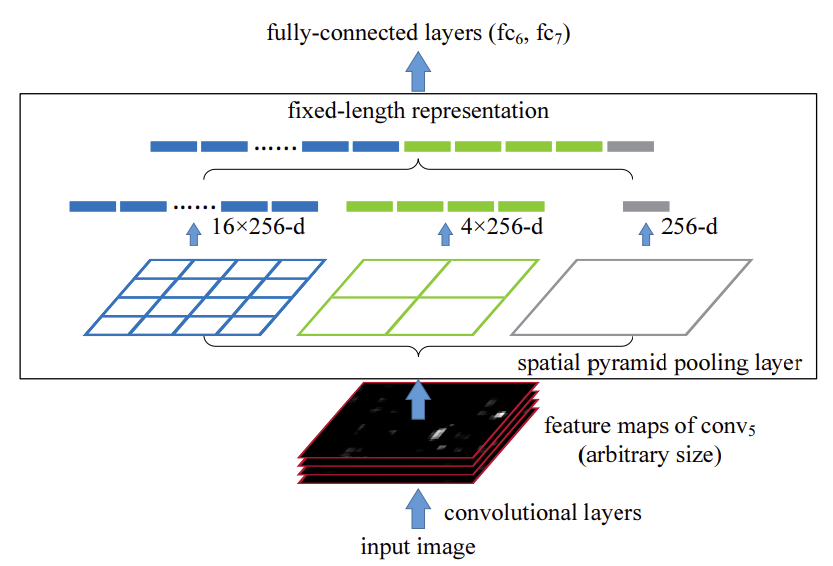

```
Convolution layer들을 거쳐 추출된 feature map을 인풋으로 받는다  
그리고 이를 미리 정해져 있는 영역으로 나누어 준다 
위의 예시에서는 미리 4x4, 2x2, 1x1 세 가지 영역을 제공하며, 각각을 하나의 피라미드라고 부른다 
여기서 피라미드의 한 칸을 bin이라고 한다 
예를 들어 입력이 64 x 64 x 256 크기의 피쳐 맵이 들어온다고 했을 때, 4x4의 피라미드의 bin의 크기는 16x16이 된다 
각 bin에서 max pooling을 수행하고 그 결과를 쭉 이어 붙인다 
입력 feature map의 채널 크기를 k, bin의 개수를 m이라고 했을 때 최종 결과는 k*m차원 벡터이다 
위의 예시는 k=256, m=(16+4+1)=21 
입력 이미지의 크기와 상관없이 미리 설정한 bin의 수와 cnn의 채널값에 의해 출력이 결정되기 때문에 
항상 동일한 크기의 결과를 반환하게 된다 
```